In [3]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

2023-01-14 10:56:46.280072: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [34]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

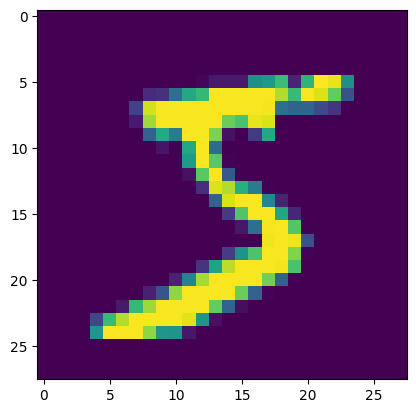

In [35]:
plt.imshow(x_train[0])

In [36]:
x_train, x_test = x_train[...,np.newaxis]/255.0, x_test[...,np.newaxis]/255.0

In [37]:
x_train.shape

(60000, 28, 28, 1)

In [38]:
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

In [39]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [42]:
from keras.models import Sequential
from sklearn.decomposition import PCA
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

model = Sequential([
    Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation="relu"),
    Dense(10, activation="softmax")
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])



In [44]:
model.fit(x_train, y_train, epochs=10, validation_split=0.1)

Epoch 1/10
1688/1688 [==============================] - 25s 14ms/step - loss: 0.0309 - accuracy: 0.9906 - val_loss: 0.0278 - val_accuracy: 0.9910
Epoch 2/10
1688/1688 [==============================] - 20s 12ms/step - loss: 0.0199 - accuracy: 0.9937 - val_loss: 0.0277 - val_accuracy: 0.9918
Epoch 3/10
1688/1688 [==============================] - 20s 12ms/step - loss: 0.0133 - accuracy: 0.9959 - val_loss: 0.0422 - val_accuracy: 0.9885
Epoch 4/10
1688/1688 [==============================] - 23s 14ms/step - loss: 0.0100 - accuracy: 0.9968 - val_loss: 0.0389 - val_accuracy: 0.9905
Epoch 5/10
1688/1688 [==============================] - 22s 13ms/step - loss: 0.0074 - accuracy: 0.9976 - val_loss: 0.0456 - val_accuracy: 0.9885
Epoch 6/10
1688/1688 [==============================] - 21s 12ms/step - loss: 0.0065 - accuracy: 0.9980 - val_loss: 0.0526 - val_accuracy: 0.9902
Epoch 7/10
1688/1688 [==============================] - 18s 10ms/step - loss: 0.0048 - accuracy: 0.9985 - val_loss: 0.0415 -

In [45]:
output = model.predict(x_test)

313/313 [==============================] - 1s 4ms/step


In [49]:
y_test_labels = np.argmax(y_test, axis=1)

In [68]:
color_list = ['blue', 'green', 'yellow', 'brown', 'black', 'cyan', 'orange', 'olive', 'purple', 'pink']
color_map = {i: color_list[i] for i in range(10)}

colors = [color_map[y] for y in y_test_labels]

In [ ]:
pca = PCA(n_components=2)
pca_output = pca.fit_transform(output)

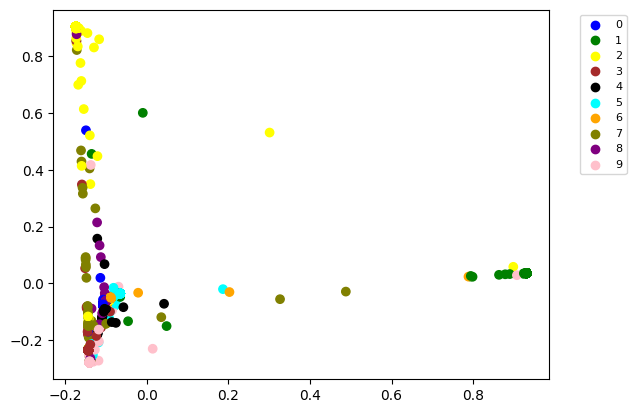

In [69]:
scatter = plt.scatter(pca_output[:, 0], pca_output[:, 1], c=colors)

for i in range(10):
    plt.scatter([], [], c=color_map[i], label=str(i))
plt.legend(scatterpoints=1, bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)

plt.show()

In [ ]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, perplexity=30, n_iter=1000)
tsne_output = tsne.fit_transform(output)

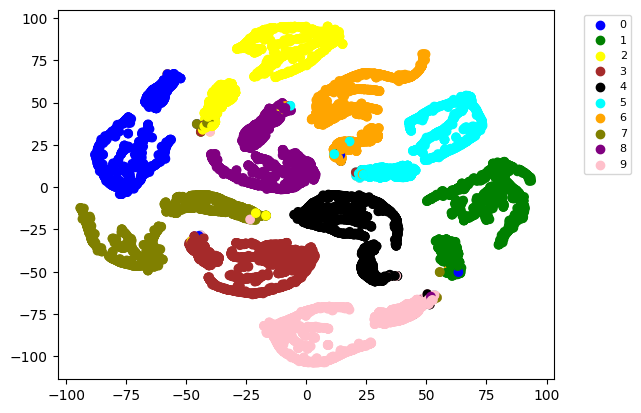

In [70]:
plt.scatter(tsne_output[:, 0], tsne_output[:, 1], c=colors)

for i in range(10):
    plt.scatter([], [], c=color_map[i], label=str(i))
plt.legend(scatterpoints=1, bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)

plt.show()